In [1]:
import plotnine as p9
import pandas as pd
import numpy as np

In [2]:
# Use the utility .py scripts, produce the final dataframe and the relevant OLS models for visualization
import main
df_final, result = main.main()

# importing linear regression results
lm0 = result['OLS_with_0_control']
lm_control = result['OLS_with_controls']
lm_control_interaction = result['OLS_with_controls_and_interactions']

Dataset ["PLACES_2019.csv"] read in successfully!
Current shape of the dataset: (27210, 63)
Here's a sample of the dataset:
      StateAbbr      PlaceName  PlaceFIPS    TractFIPS        Place_TractID  \
22683        TX      Arlington    4804000  48439111525  4804000-48439111525   
21742        RI       Cranston    4419180  44007014200  4419180-44007014200   
21576        PA     Pittsburgh    4261000  42003080700  4261000-42003080700   
7326         CO       Loveland     846465   8069001804  0846465-08069001804   
20477        OK  Oklahoma City    4055000  40109102300  4055000-40109102300   
2288         CA      Escondido     622804   6073020207  0622804-06073020207   
12415        KY     Louisville    2148006  21111011708  2148006-21111011708   
5564         CA  San Francisco     667000   6075012302  0667000-06075012302   

       Population2010  ACCESS2_CrudePrev ACCESS2_Crude95CI  \
22683            6428               31.3      (29.1, 33.7)   
21742            5715               14.3

In [3]:
def prediction (m, df):
    #fix = sm.add_constant(df[columns])
    return m.predict()

df_final['prediction1'] = prediction(lm0, df_final)
df_final['prediction2'] = prediction(lm_control, df_final)
df_final['prediction3'] = prediction(lm_control_interaction, df_final)

df_final[['prediction1', 'prediction2', 'prediction3']]


#change from long to wide data format for data visualization
keep_col = list(df_final.columns)
keep_col.remove('prediction1')
keep_col.remove('prediction2')
keep_col.remove('prediction3')

df_final_long= pd.melt(df_final, id_vars= keep_col)

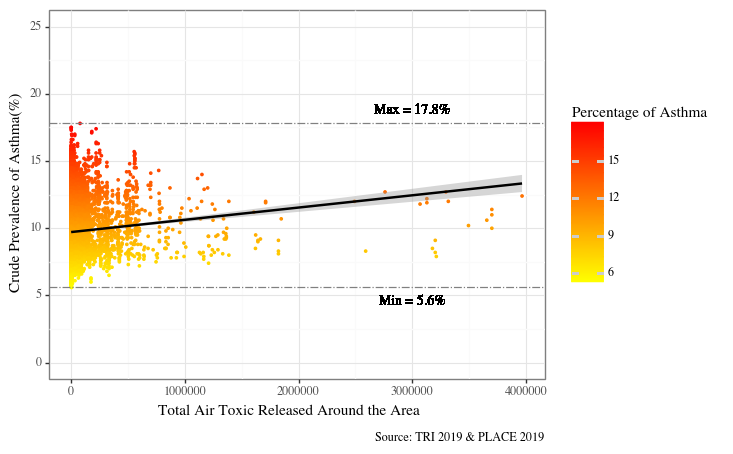

<ggplot: (8760492634869)>

In [4]:
scatter1 = (p9.ggplot(df_final, p9.aes("air_toxic_release", 'asthma_prevalence'))+
     p9.geom_point(p9.aes(color = "asthma_prevalence"), size = 0.5) +
     p9.scale_color_gradient(low='Yellow', high='red')+
     p9.stat_smooth(method = 'lm', se=True)+
     #p9.ggtitle("Asthma is more prevalent in area with more toxic released")+
     p9.xlab("Total Air Toxic Released Around the Area")+
     p9.ylab("Crude Prevalence of Asthma(%)")+
     p9.scales.ylim(0,25)+
     p9.labs(caption= "Source: TRI 2019 & PLACE 2019", color="Percentage of Asthma")+
     p9.theme_bw()+
     p9.theme(text=p9.element_text(family='Times'))+
     p9.geom_hline(p9.aes(yintercept= max(df_final.asthma_prevalence)), color="GREY", linetype='dashdot')+
     p9.geom_text(p9.aes(x = 3000000, y = max(df_final.asthma_prevalence)+1), label = ("Max = "+str(max(df_final.asthma_prevalence))+"%"), size = 10)+
     p9.geom_hline(p9.aes(yintercept = min(df_final.asthma_prevalence)), color="GREY", linetype= "dashdot")+
     p9.geom_text(p9.aes(x = 3000000, y = min(df_final.asthma_prevalence)-1), label = ("Min = "+str(min(df_final.asthma_prevalence))+"%"), size = 10)
     )

scatter1

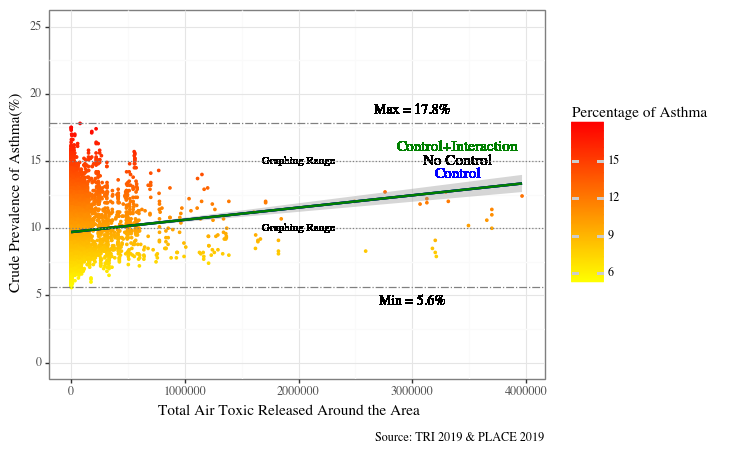

<ggplot: (8760494251531)>

In [5]:
scatter2_1 = (p9.ggplot(df_final, p9.aes(x= "air_toxic_release", y= 'asthma_prevalence'))+
     p9.geom_point(p9.aes(color = "asthma_prevalence"), size = 0.5) +
     p9.scale_color_gradient(low='yellow', high='red')+
     p9.stat_smooth(method = 'lm', se=True)+
     p9.geom_text(p9.aes(x = 3400000, y = 15),  label = "No Control", color = "BLACK")+
#     p9.ggtitle("Adding Control and Interaction Still Shows Similar Tendency")+
     p9.xlab("Total Air Toxic Released Around the Area")+
     p9.ylab("Crude Prevalence of Asthma(%)")+
     p9.scales.ylim(0, 25)+
     p9.labs(caption= "Source: TRI 2019 & PLACE 2019", color="Percentage of Asthma")+
     p9.theme_bw()+
     p9.theme(text=p9.element_text(family='Times'))+
     p9.geom_smooth(p9.aes('air_toxic_release','prediction2'), color= 'BLUE', se=False)+
     p9.geom_text(p9.aes(x= 3400000, y = 14),  label = "Control", color = 'BLUE')+
     p9.geom_smooth(p9.aes('air_toxic_release','prediction3'), color= 'GREEN', se=False)+
     p9.geom_text(p9.aes(x = 3400000, y = 16),  label = "Control+Interaction", color = "GREEN")+
     p9.geom_hline(p9.aes(yintercept= max(df_final.asthma_prevalence)), color="GREY", linetype='dashdot')+
     p9.geom_text(p9.aes(x = 3000000, y = max(df_final.asthma_prevalence)+1), label = ("Max = "+str(max(df_final.asthma_prevalence))+"%"), size = 10)+
     p9.geom_hline(p9.aes(yintercept = min(df_final.asthma_prevalence)), color="GREY", linetype= "dashdot")+
     p9.geom_text(p9.aes(x = 3000000, y = min(df_final.asthma_prevalence)-1), label = ("Min = "+str(min(df_final.asthma_prevalence))+"%"), size = 10)+
     p9.geom_hline(p9.aes(yintercept = 10), color="GREY", linetype= "dotted")+
     p9.geom_text(p9.aes(x = 2000000, y = 15), label = ("Graphing Range"), size = 8)+
     p9.geom_hline(p9.aes(yintercept = 15), color="GREY", linetype= "dotted")+
     p9.geom_text(p9.aes(x = 2000000, y = 10), label = ("Graphing Range"), size = 8)
)

scatter2_1

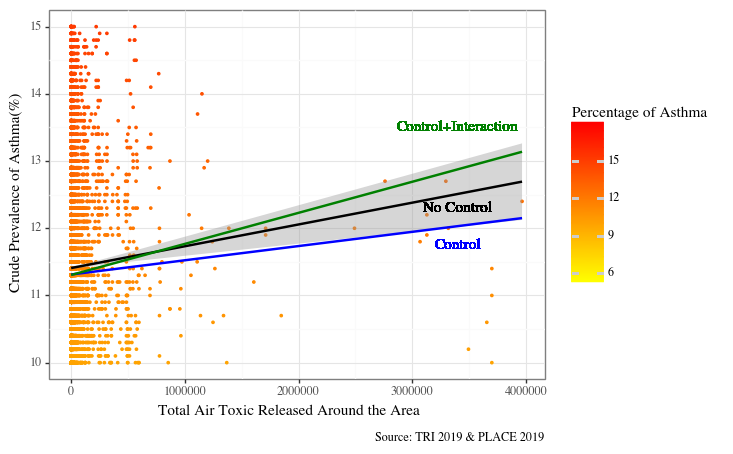

<ggplot: (8760494284194)>

In [6]:
scatter2_2 = (p9.ggplot(df_final, p9.aes(x= "air_toxic_release", y= 'asthma_prevalence'))+
     p9.geom_point(p9.aes(color = "asthma_prevalence"), size = 0.5) +
     p9.scale_color_gradient(low='yellow', high='red')+
     p9.stat_smooth(method = 'lm', se=True)+
     p9.geom_text(p9.aes(x = 3400000, y = 12.3),  label = "No Control", color = "BLACK")+
#     p9.ggtitle("Zooming In: The Slim Difference between Controlling and Adding Interaction")+
     p9.xlab("Total Air Toxic Released Around the Area")+
     p9.ylab("Crude Prevalence of Asthma(%)")+
     p9.scales.ylim(10, 15)+
     p9.labs(caption= "Source: TRI 2019 & PLACE 2019", color="Percentage of Asthma")+
     p9.theme_bw()+
     p9.theme(text=p9.element_text(family='Times'))+
     p9.geom_smooth(p9.aes('air_toxic_release','prediction2'), color= 'BLUE', se=False)+
     p9.geom_text(p9.aes(x= 3400000, y = 11.75),  label = "Control", color = 'BLUE')+
     p9.geom_smooth(p9.aes('air_toxic_release','prediction3'), color= 'GREEN', se=False)+
     p9.geom_text(p9.aes(x = 3400000, y = 13.5),  label = "Control+Interaction", color = "GREEN")
)
scatter2_2

In [7]:
import geopandas as gpd
#df_loc is a dataframe for the PLACE data
df_loc = df1
#il_geo is a geodataframe for the Illinois map
#Caution: for mapping to work, all other shapefiles should be in the same file with the .shp file
il_geo = gpd.read_file("/Users/minahkim/Documents/Fall2022/PPOL564/final_project/cb_2019_IL_tract_500k/cb_2019_17_tract_500k.shp", low_memory=False)

NameError: name 'df1' is not defined

In [ ]:
#select the location information from the PLACE data
df_loc = df_loc[['StateAbbr', 'PlaceName', 'TractFIPS','Geolocation']]
#df_loc_il: select TRACTFIPS and Geolocation the PLACE data (limited to Illinois)
df_loc_il = df_loc[df_loc['StateAbbr']== "IL"]
df_loc_il = df_loc[['TractFIPS','Geolocation']]


In [ ]:
import re
#df_il: filtering the final dataframe(PLACE & TRS &Income/Race) to Illinois
df_il= df_final.loc[df_final.StateAbbr == "IL"]
#df_il_graph: adding the location information from the PLACE data to the final dataframe.
#Through this process, we now have the FIPS code and the coordinate in the smae dataframe
#We create the column for latitude (lat) and longtitude (lng) based on the newly added Geolocation 
df_il_graph= pd.merge(df_il, df_loc_il, on = "TractFIPS", how = "left")
pattern= r'\((.*),\s*(.*)\)'
df_il_graph['lat'] = [re.sub(pattern, r"\1", loc) for loc in df_il_graph.Geolocation]
df_il_graph['lng'] = [re.sub(pattern, r"\2", loc) for loc in df_il_graph.Geolocation]
df_il_graph['lat'] = [float(num) for num in df_il_graph['lat']]
df_il_graph['lng'] = [float(num) for num in df_il_graph['lng']]


In [ ]:
#il_geo is the Geodataframe that contains the map of Illinois
#However, the FIPS code in this dataframe is not written in a single column
#Therefore, we create the "TractFIPS" code to record a 11 digit FIPS code
il_geo["TractFIPS"]= [str(il_geo.STATEFP[code])+str(il_geo.COUNTYFP[code])+str(il_geo.TRACTCE[code]) for code in range(il_geo.shape[0])]
il_geo["TractFIPS"] = il_geo["TractFIPS"].astype(int)

In [ ]:
#new_df: the merge of the Illinois map and the final dataframe(with geolocation data)
#This dataframe will be necessary to color the map with the asthma prevalence rate
new_df = pd.merge(il_geo, df_il_graph, on = "TractFIPS", how = "left")

#Data cleaning for duplicate rows in new_df
#create a dataframe count that saves the number of occurances of TractFIPS
count= pd.DataFrame(index = new_df.TractFIPS.unique())
count['call'] =0

#counting the data and puting it into the call column
for fips in new_df.TractFIPS:
    count.call.loc[fips] += 1

#Function that drop the row of the TractFIPS except for one
def droprow (num):
    list_row = new_df.index[new_df["TractFIPS"] == num]
    return new_df.drop(labels=list_row[1:], axis=0)   

#Drop all the rows that came out more than one
for num in list(count[count['call'] > 1].index):
    new_df = droprow(num)

new_df.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'TractFIPS', 'StateAbbr', 'PlaceName',
       'asthma_prevalence', 'income_hh', 'air_toxic_release',
       'rate_of_uninsurance', 'white_pct', 'black_pct', 'asian_pct',
       'hisp_pct', 'white_majority', 'black_majority', 'asian_majority',
       'hisp_majority', 'other_majority', 'prediction1', 'prediction2',
       'prediction3', 'Geolocation', 'lat', 'lng'],
      dtype='object')

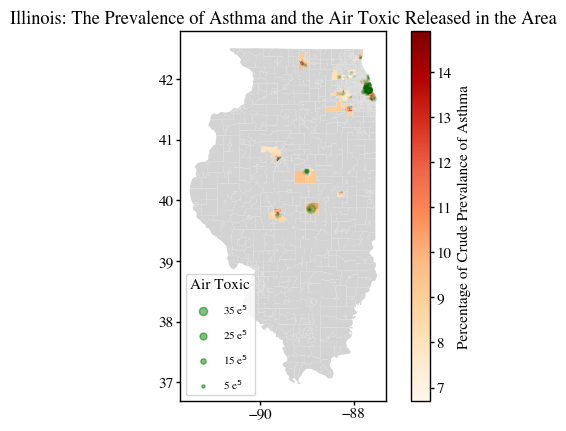

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#draw a map of Illinois - coloring with asthma and adding dots based on the air toxic release
new_df.plot(column = "asthma_prevalence", legend = True, legend_kwds={'label': "Percentage of Crude Prevalance of Asthma"}, missing_kwds={'color': 'lightgrey'}, cmap = 'OrRd')
plt.scatter(x = new_df.lng, y = new_df.lat, s = new_df.air_toxic_release/100000, edgecolors='darkgreen', alpha = 0.1, c='green')
mpl.rc('font',family='Times')
plt.title("Illinois: The Prevalence of Asthma and the Air Toxic Released in the Area")
for toxic in [35, 25, 15,5]:
    plt.scatter([], [], c='green', alpha=0.5, s=toxic,
                label=str(toxic) + ' e$^5$')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Air Toxic', fontsize= 8, loc='lower left')

plt.show()


In [ ]:
#Subsetting to County
#create a column "county" that records the part of FIPS code that represents the county
new_df['County'] = [re.sub(r'17(\d{3})\d+', r"\1", str(fips)) for fips in new_df.TractFIPS]
#df_cook: subset the new_df based on County number 031 = Cook County
df_cook = new_df[new_df['County']== '031']

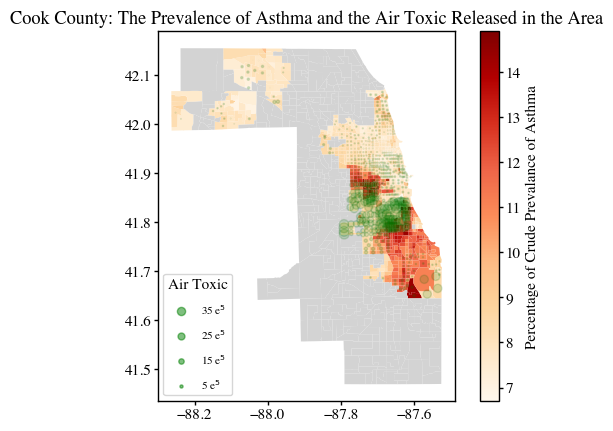

In [ ]:
#draw a map of Cook County - coloring with asthma and adding dots based on the air toxic release
df_cook.plot(column = "asthma_prevalence", legend = True, legend_kwds={'label': "Percentage of Crude Prevalance of Asthma"}, missing_kwds={'color': 'lightgrey'}, cmap = 'OrRd')
plt.scatter(x = df_cook.lng, y = df_cook.lat, s = df_cook.air_toxic_release/10000, edgecolors='darkgreen', alpha = 0.15, c='green')
plt.title("Cook County: The Prevalence of Asthma and the Air Toxic Released in the Area")
for toxic in [35, 25, 15,5]:
    plt.scatter([], [], c='green', alpha=0.5, s=toxic,
                label=str(toxic) + ' e$^5$')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Air Toxic', fontsize= 8, loc='lower left')

plt.show()

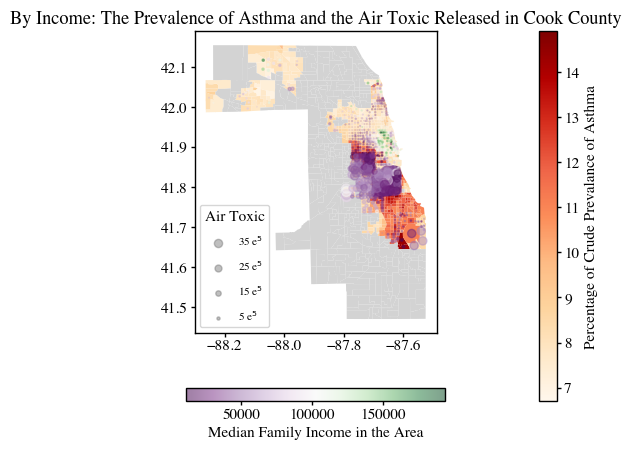

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

#draw a map of Cook County - coloring with asthma and adding dots based on the air toxic release & median household income
#purple is low income, and green is high income

df_cook.plot(column = "asthma_prevalence", legend = True, legend_kwds={'label': "Percentage of Crude Prevalance of Asthma"}, missing_kwds={'color': 'lightgrey'}, cmap = 'OrRd')
plt.scatter(x = df_cook.lng, y = df_cook.lat, s = df_cook.air_toxic_release/10000, alpha = 0.5, c = df_cook.income_hh, cmap = "PRGn")
plt.colorbar(label="Median Family Income in the Area", orientation= 'horizontal', fraction = 0.035)
plt.title("By Income: The Prevalence of Asthma and the Air Toxic Released in Cook County")
for toxic in [35, 25, 15,5]:
    plt.scatter([], [], c='grey', alpha=0.5, s=toxic,
                label=str(toxic) + ' e$^5$')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Air Toxic', fontsize= 8, loc='lower left')
plt.show()


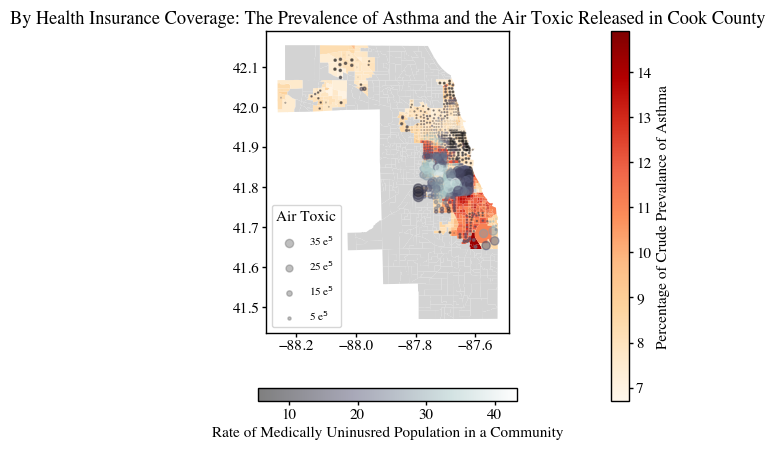

In [ ]:
#draw a map of Cook County - coloring with asthma and adding dots based on the air toxic release & median household income
#purple is low income, and green is high income

df_cook.plot(column = "asthma_prevalence", legend = True, legend_kwds={'label': "Percentage of Crude Prevalance of Asthma"}, missing_kwds={'color': 'lightgrey'}, cmap = 'OrRd')
plt.scatter(x = df_cook.lng, y = df_cook.lat, s = df_cook.air_toxic_release/10000, alpha = 0.5, c = df_cook.rate_of_uninsurance, cmap = "gist\_yarg")
plt.colorbar(label="Rate of Medically Uninusred Population in a Community", orientation= 'horizontal', fraction = 0.035)
plt.title("By Health Insurance Coverage: The Prevalence of Asthma and the Air Toxic Released in Cook County")
for toxic in [35, 25, 15,5]:
    plt.scatter([], [], c='grey', alpha=0.5, s=toxic,
                label=str(toxic) + ' e$^5$')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Air Toxic', fontsize= 8, loc='lower left')
plt.show()
#purple is low income, and green is high income

In [ ]:
#subset the df_cook dataset based on racial demography
def race_data (race_column):
    new= df_cook.copy()
    new.asthma_prevalence= np.where(new[race_column]==1, new.asthma_prevalence, np.nan)
    new.air_toxic_release= np.where(new[race_column]==1, new.air_toxic_release, np.nan)
    return new


df_cook_white = race_data("white_majority")
df_cook_black = race_data("black_majority")
df_cook_asian = race_data("asian_majority")
df_cook_hisp = race_data("hisp_majority")
df_cook_other = race_data("other_majority")



In [ ]:
def graph_by_race(dataframe, race):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    dataframe.plot(column = "asthma_prevalence", legend = True, legend_kwds={'label': "Percentage of Crude Prevalance of Asthma"}, missing_kwds={'color': 'lightgrey'}, cmap = 'OrRd')
    plt.scatter(x = dataframe.lng, y = dataframe.lat, s = dataframe.air_toxic_release/10000, edgecolors='darkgreen', alpha = 0.15, c='green')

#    plt.title(str(race) + " Majority Communities: The Prevalence of Asthma and the Air Toxic Released in Cook County")
    for toxic in [35, 25, 15,5]:
        plt.scatter([], [], c='green', alpha=0.5, s=toxic,
                    label=str(toxic) + ' e$^5$')
    plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Air Toxic', fontsize= 8, loc='lower left')
    return plt.show()

TypeError: _plot_polygon_collection() got multiple values for argument 'values'

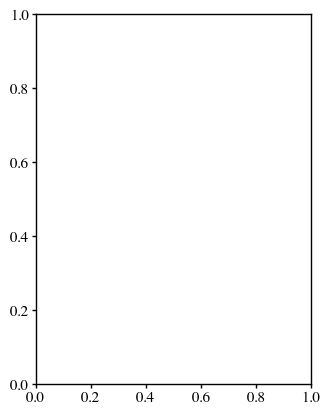

In [ ]:
graph_by_race(df_cook_white, "White")

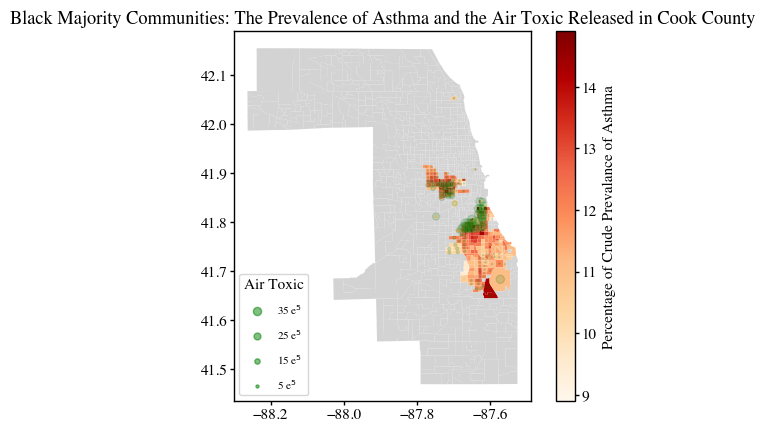

In [ ]:
graph_by_race(df_cook_black, "Black")

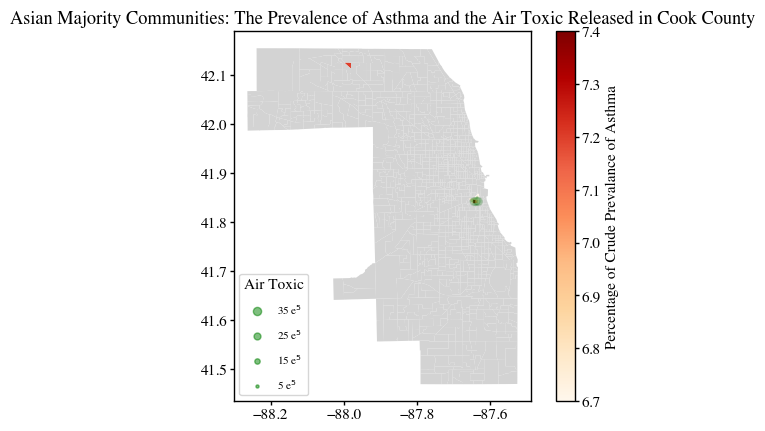

In [ ]:
graph_by_race(df_cook_asian, "Asian")

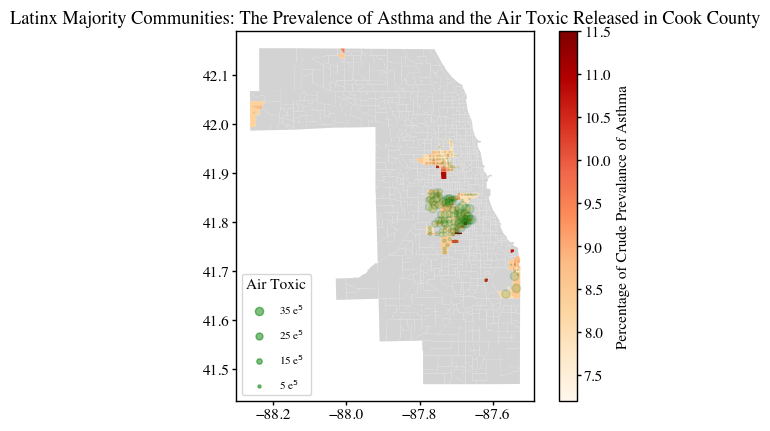

In [ ]:
graph_by_race(df_cook_hisp, "Latinx")

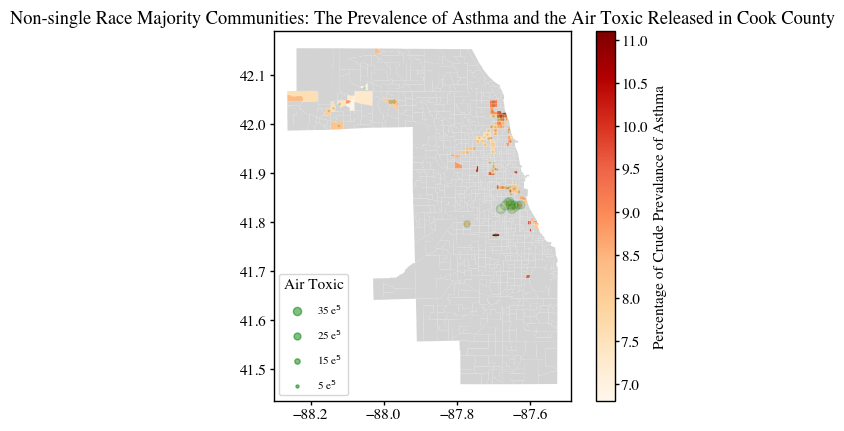

In [ ]:
graph_by_race(df_cook_other, "Non-single Race")